In [5]:
import pandas as pd

In [6]:
from matplotlib import pyplot as plt

In [7]:
import numpy as np

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [10]:
data = pd.read_csv('enade2017_ccc_ne_prep.csv')

In [11]:
data.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,A,...,A,A,C,A,A,D,A,E,A,45.2
1,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,F,22,A,...,B,F,K,A,B,B,A,H,F,48.4
2,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,A,...,A,A,B,A,A,A,E,H,I,55.5
3,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,32,A,...,A,B,A,A,A,A,A,E,A,23.5
4,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,25,A,...,A,B,G,A,C,E,E,E,F,54.3


In [12]:
# Ordena os dados por tipo de auxílio e tipo de bolsa
# QE_I12 referencia a pergunta sobre tipo de auxílio
# QE_I13 referencia a pergunta sobre tipo de bolsa

data = data.sort_values(by=['QE_I12', 'QE_I13'])

Para investigar a relação e influência dos auxílios recebidos nas notas dos alunos, podemos a princípio visualizar a proporção das notas para cada um dos tipos de auxílio no gráfico abaixo.

Legenda:

A - Nenhum;
B - Auxílio Moradia;
C - Auxílio Alimentação;
D - Auxílio Moradia e Alimentação;
E - Auxílio Permanência;
F - Outro tipo de auxílio;

Text(0.5, 0, 'Tipo de auxílio')

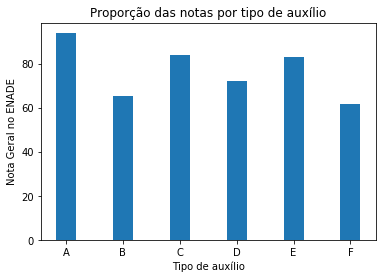

In [13]:
# Analisando proporção das notas em relação à presença ou não de auxílio permanência
# Tipos de auxílios: moradia, alimentação, etc
# Legenda: A - Nenhum; B - Aux Moradia; C - Aux Aliment; D - Aux Moradia e Aliment;
# E - Aux Perm; F - Outro tipo de aux

fig, ax = plt.subplots()
x = np.arange(len(data.NT_GER))
width = 0.35  # the width of the bars
rects1 = ax.bar(data.QE_I12, data.NT_GER, width, label='Auxílio permanência')
ax.set_ylabel('Nota Geral no ENADE')
ax.set_title('Proporção das notas por tipo de auxílio')
ax.set_xlabel('Tipo de auxílio')



Text(0.5, 0, 'Tipo de bolsa')

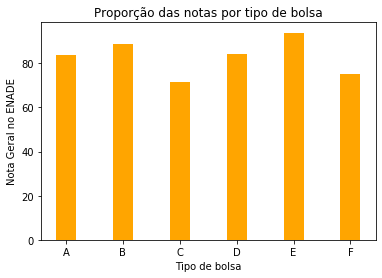

In [14]:
fig, ax = plt.subplots()
x = np.arange(len(data.NT_GER))
width = 0.35  # the width of the bars
rects1 = ax.bar(data.QE_I13, data.NT_GER, width, label='Tipo de bolsa', color='orange')
ax.set_ylabel('Nota Geral no ENADE')
ax.set_title('Proporção das notas por tipo de bolsa')
ax.set_xlabel('Tipo de bolsa')

In [17]:
data.regression()

AttributeError: 'DataFrame' object has no attribute 'regression'

In [23]:
# Analisando a média das notas gerais para cada um dos tipos de auxílio

# percebemos que a maior média se refere ao D - Alunos com Auxílio Moradia e Alimentação

data.groupby('QE_I12').mean()['NT_GER']


QE_I12
A    44.481955
B    42.131034
C    45.440000
D    49.531579
E    48.347619
F    41.876744
Name: NT_GER, dtype: float64

In [35]:
# Em relação ao recebimento de algum tipo de bolsa recebido, se destacam duas características:
# Alunos sem qualquer tipo de bolsa (A) obtiveram a menor média de notas
# Alunos que obtiveram bolsa PET (E) obtiveram a maior média de notas

data.groupby('QE_I13').mean()['NT_GER']

QE_I13
A    40.453027
B    50.363291
C    46.729907
D    50.734545
E    53.283636
F    45.644828
Name: NT_GER, dtype: float64

In [40]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(data.QE_I12, data.NT_GER)
print(rfre)

ValueError: could not convert string to float: 'A'